In [954]:
# ДЗ 
# 1. Для изображения sar_3.jpg найти наиболее протяженный участок
# (выделить линии при помощи преобразования Хафа)
# 2. Для изображения sar_3.jpg провести исследование алгоритмов бинаризации, выделить участок дорожной полосы.

In [955]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import copy, math

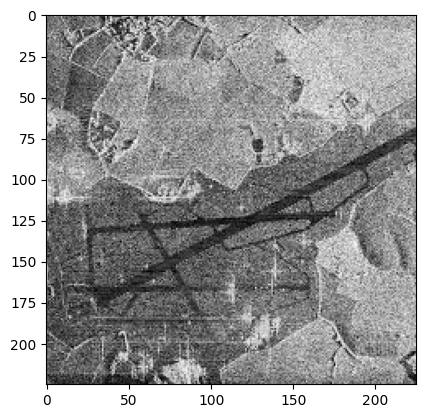

In [956]:
image = cv2.imread('sar_3.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
plt.imshow(image_gray, cmap="gray")

# 1. Нахождение наиболее протяженного участка

In [957]:
image = cv2.imread('sar_3.jpg')
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [958]:
canny = cv2.Canny(image_gray,50,150,apertureSize = 3)
lines = cv2.HoughLines(canny, 1, np.pi / 180, 140)

In [959]:
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv2.line(image_gray, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)
        length = np.sqrt((pt1[0] - pt2[0])**2 + (pt1[1] - pt2[1])**2)
        if length > max:
            max = length
            longest = (pt1, pt2)
    if longest:
        cv2.line(image, longest[0], longest[1], (0, 0, 255), 7, cv2.LINE_AA)

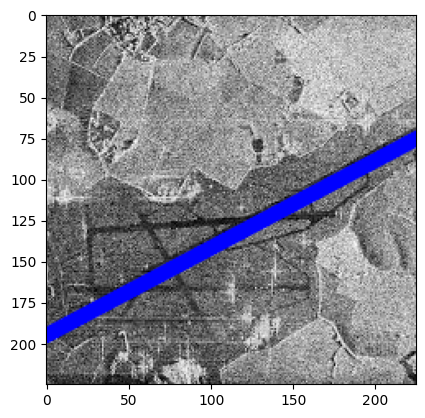

In [960]:
plt.imshow(image)

# 2. Для изображения sar_3.jpg провести исследование алгоритмов бинаризации, выделить участок дорожной полосы.

3.1 Точечная бинаризация

In [961]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
bin_img = copy.deepcopy(image_gray)
T  = 80
bin_img[image_gray < T] = 0
bin_img[image_gray >= T] = 255

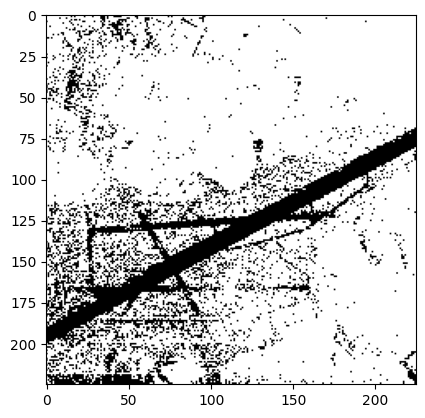

In [962]:
plt.imshow(bin_img, cmap="gray")

3.2 Бинаризация Отсу

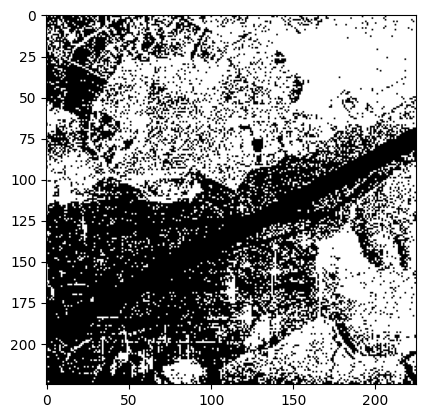

In [963]:
_,th2 = cv2.threshold(image_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(th2, cmap="gray")

3.3 Адаптивная бинаризация

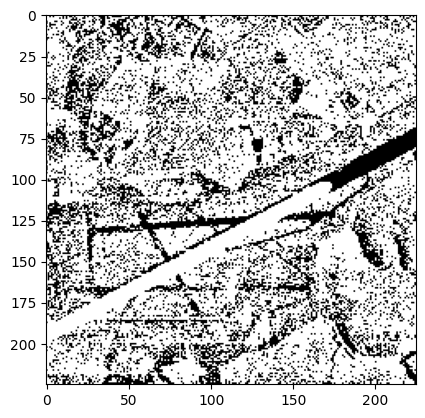

In [964]:
th3 = cv2.adaptiveThreshold(image_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,71,21)
plt.imshow(th3, cmap="gray")

3.4 Оператор Собеля

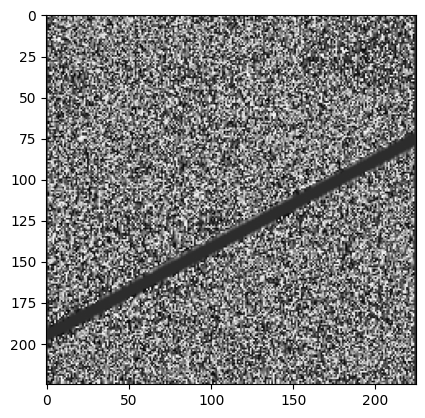

In [965]:
scale = 1
delta = 0
ddepth = cv2.CV_16S
grad_x = cv2.Sobel(image_gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(image_gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
plt.imshow((grad_x - grad_x.min())*255, cmap="gray")

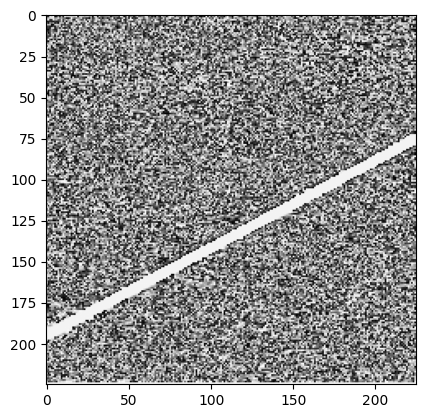

In [966]:
plt.imshow((grad_y - grad_y.min())*255, cmap="gray")

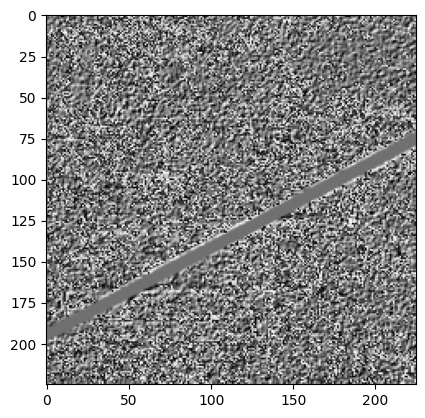

In [967]:
grad = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5,0.0)
plt.imshow((grad - grad.min())*255, cmap="gray")

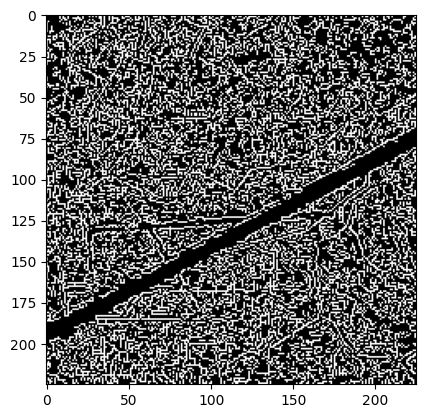

In [968]:
edges = cv2.Canny(image_gray,100,200)
plt.imshow(edges, cmap="gray")

In [969]:
bin_img = copy.deepcopy(image_gray)

T  = 40
bin_img[image_gray < T] = 0
bin_img[image_gray >= T] = 255

blur = cv2.GaussianBlur(bin_img, (5, 5), 0)
thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 55, 2)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

image_line_road = image.copy()
road_mask = np.zeros_like(image_gray)
image_with_roads = image.copy()

if contours:
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > 500:
            cv2.fillPoly(road_mask, [contour], 255)
            cv2.fillPoly(image_with_roads, [contour], (0, 0, 255))

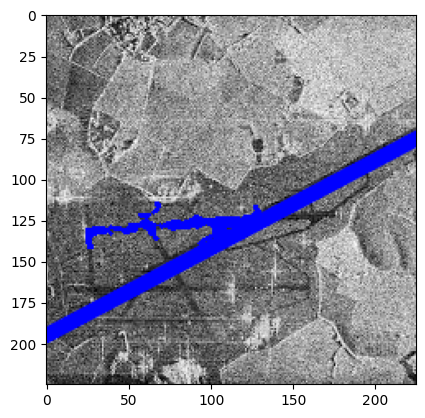

In [970]:
plt.imshow(image_with_roads, cmap='gray')